#### Introduction:
Naive Bayes is a machine learning classsification algorithm. The output generated by Naive Bayes algorithm is usually in the form of 1's and 0's or in the form of True and False.

Naive Bayes is a supervised learning algorithm, which means that we already know what the answer is going to be, we just have to train the model to identify the answer.

This model imports customer reviews about a restaurant in Mumbai, India called Dollally. The end goal of this model is to differentiate between a good and a bad review.

####  Importing all the important libraries

In [1]:
import pandas as pd # pandas for reading and manuplating data
import numpy as np # numpy for arithmatic operations
import seaborn as sns # sesaborn is also used for visualizations
import matplotlib.pyplot as plt # matplotlib for visualization
import sklearn #sklearn for building the algorithm

Most of the libraries such as pandas, numpy, matplotlib are pre installed in anacondas jupyter notebook. However, some libraries such as keras would need to be installed by typing !pip install(name of the library)

####  Reading the data

Pandas read function is one of the ways to read/import the dataset. Other ways of reading/immporting the dataset is through links or by using the inbuild dataset provided by python

In [2]:
nb_df=pd.read_csv(r'E:\LYIT\Eoghan Furey ML\Assignment 2 Practical\3-Naive_Baise\Dollally_review.csv',encoding='latin1') 
# using encoding='latin1 bcz without it I am getting SyntaxError: (unicode error)'

nb_df.head()
# .head() or .tail() will show you a part of the entire dataset
# If we do not mention how many variables you want to see, the python will by default show only 5 variables.

,Review,Rating,Location
0,One of the most casual places suburbs has. Wit...,4,Andheri
1,Doolally one of the coolest place to chill and...,4,Andheri
2,It?s a great place to hangout with your friend...,5,Andheri
3,ÿDoolally Taproom has a very nice jovial atmos...,4,Andheri
4,ÿService in this place is really bad! The wait...,1,Andheri


#### Creating a new label

Creating a labelled coulumn so that the model can be trained on it

In [3]:
nb_df['Label']=['1' if star > 3 else 0 for star in nb_df['Rating']]
#If the rating is above 3 star then the review is labelled as a good review i.e 1
# If the rating is below 3 star then the review is labelled as a bad review i.e 0

nb_df.head()
# .head() or .tail() will show you a part of the entire dataset
# If we do not mention how many variables you want to see, the python will by default show only 5 variables.

,Review,Rating,Location,Label
0,One of the most casual places suburbs has. Wit...,4,Andheri,1
1,Doolally one of the coolest place to chill and...,4,Andheri,1
2,It?s a great place to hangout with your friend...,5,Andheri,1
3,ÿDoolally Taproom has a very nice jovial atmos...,4,Andheri,1
4,ÿService in this place is really bad! The wait...,1,Andheri,0


In [4]:
# checking a review

nb_df.iloc[27]["Review"] #iloc is used to get to a particular row of the dataset.

"Doolally is my all time favorite spot. No loud music , no dim lights . It's the perfect fun place for get-togethers. Plus they have lots of fun games and quiz nights.\nThe only disappoint is they have stopped apple cider which was my favorite and replaced it with mango cider(which is equally good but apple cider is louve)"

####  Checking the shape, size, correlation, description and the info of the dataset

In [5]:
#checkinng the shape of the data

nb_df.shape #.shape tells us how many rows and columns are there in the dataset

(49, 4)

In [6]:
nb_df.describe() #it will tell us whats the mean, standard deviation and the maximum values along with the total counts

,Rating
count,49.000000
mean,4.020408
std,1.050591
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
nb_df.info() # .info will tell us what type of data we have i.e whether it is numerical, cateogrical, float etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
Review      49 non-null object
Rating      49 non-null int64
Location    49 non-null object
Label       49 non-null object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


#### Dividinng the dataset into x and y variables

In [8]:
x=nb_df["Review"]
y=nb_df["Label"]


In [9]:
y=y.astype('int') # without specifying y is the int type, getting unknown label type error, thus this line of code

In [10]:
# Checking if the variables have been properly assigned to the designated columns
print(x.head())
print(y.head())

0    One of the most casual places suburbs has. Wit...
1    Doolally one of the coolest place to chill and...
2    It?s a great place to hangout with your friend...
3    ÿDoolally Taproom has a very nice jovial atmos...
4    ÿService in this place is really bad! The wait...
Name: Review, dtype: object
0    1
1    1
2    1
3    1
4    0
Name: Label, dtype: int32


####  Preprocessing

In [11]:
import nltk
# since we are dealing with text's importing natural language text processing (NLTK) to handle all the reviews
nltk.download('stopwords') # Downloading stopwords so that words such as I,me,you, are etc can be removed

[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords# Downloading stopwords so that words such as I,me,you, are etc can be removed
import string # importing string bcz was getting string error while joining sentences
stop = set(stopwords.words('english'))
import re # importing Regular EXpression to deal with repetative words

In [13]:
#Writing a function to revome hyperlinks, special symbols such as @,# etc
# This function will also clean make all the capital alphabets small
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [14]:
cleaned_reviews = [clean_document(doc) for doc in nb_df['Review']]; # storing all the cleaning texts into a variable called cleaned_reviews
sentences = [' '.join(r) for r in cleaned_reviews ] #joining

In [15]:
# Checking if the dataset is cleaned and all the special symbols have been removed along with the hyperlink.

print(sentences[2])

great place hangout friends many arcade games keep involved till time food arrives beer nicely brewed amazing


In [16]:
! pip install wordcloud # installing wordcloud so that we can see words that occur frequently
# words that occur the most would be bigger in size.

ERROR: Invalid requirement: '#'



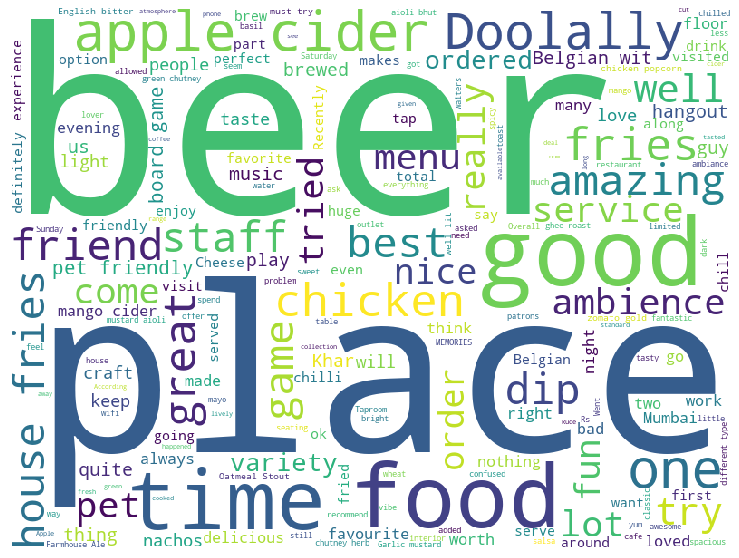

In [17]:
#Visualization in WordCloud 

from wordcloud import WordCloud, STOPWORDS

from scipy import stats # used to statistical functions


def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(x))

In [18]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer is used to create bag of words which will help machine learn whether a certan word is good or bad
bow_transformer = CountVectorizer(analyzer=clean_document).fit(x)

In [19]:
X = bow_transformer.transform(x)
# if we don't use transform function that we get ValueError: could not convert string to float:

####  Algorithm creation

It is immportant to split the dataset into training and testing so that model can learn from training dataset and perform on testing dataset. The test size for the dataset varies from industry to industry. However, a standard of 70-30 is taken in general, where 70 % of the data set is used for training and 30 % of the data is used for testing

In [20]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split
# scikit learns model selection helps us in splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # Keeping 30 % of the data for testing

In [21]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB # importing Naive Bayes
nb = MultinomialNB() #creating a variable for MultinomialNB so that it gets easier to write the code
nb.fit(X_train,y_train) # fitting the data into training set of X & Y


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
preds=nb.predict(X_test) #creating a variable for x_test predications

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
#importing confusion matrix, accuracy score and classification report from sklearn
#confusion matrix is used to double check if the model has analysed the data properly
#accuracy score will tell you what's the current accuracy of the model
print(confusion_matrix(y_test, preds))

acc=accuracy_score(y_test,preds) # x_test and y_test will be represented through variable preds
nb.score(X_train, y_train) # to get the score of the model
print("Accuracy of the model:",acc) # printing the accuracy of the score

[[1 2]
 [3 9]]
Accuracy of the model: 0.6666666666666666


In [33]:
nb.predict(bow_transformer.transform(['Very good service loved the food'])) 
 # checking if the model is able to differentiate between a good and a bad sentence

array([1])

In [36]:
print(nb.predict(bow_transformer.transform(['not a good experience, worse service ever'])))
 # checking if the model is able to differentiate between a  good and a bad sentence

[1]


#### Conclusion:
Though Naive Bayes is used to classification, for this particular dataset, model wasn't able to differentiate between good and a bad review. Major reason for that I believe is lack of bad reviews in the dataset